### 1. Prepare data for ingestion into the neural network.

In [23]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [24]:
apple_stock_df = pd.read_csv("./apple_stock_prepared.csv")
apple_stock_df.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
0,-0.464011,-0.767950,-0.747017,-0.739101,-0.639217,-0.669514,-0.646494,0.627785,-1.812133,4.368171,-1.830292,7.716514,-1.862736,8.506598,-1.880503,-0.456953,2.338571
1,-0.190969,-0.769480,-0.758587,-0.738967,-0.732728,-0.632766,-0.662760,-0.579982,-1.183392,1.505926,-1.592107,3.501353,-1.710687,5.255354,-1.767605,-0.456953,2.945714
2,-0.723175,-0.760056,-0.760125,-0.750631,-0.732592,-0.727153,-0.625758,-0.115027,-1.286573,0.152772,-1.626297,2.429129,-1.732050,4.553852,-1.782792,-0.456953,2.750000
3,-0.570132,-0.763094,-0.750650,-0.752182,-0.744357,-0.727016,-0.720797,-0.092085,-0.982726,-0.217920,-1.529132,1.347659,-1.674853,2.875177,-1.742103,-0.456953,2.941429
4,-0.692599,-0.760123,-0.753705,-0.742630,-0.745922,-0.738891,-0.720659,-0.694639,-0.034087,-0.992704,-1.141034,-0.009939,-1.444629,1.005462,-1.579137,-0.456953,3.678571


In [25]:
X = apple_stock_df[apple_stock_df.columns[0:-1]]
Y = apple_stock_df[apple_stock_df.columns[-1]]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
import random
random.seed(100)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 100)

In [29]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.5, random_state = 100)

In [30]:
X_train.shape

(156, 16)

In [31]:
X_test.shape

(20, 16)

In [32]:
X_val.shape

(20, 16)

In [33]:
def num_steps(length: int, batch_size: int):
    '''
    calculates number of steps from dataset and the batch size
    
    Parameters
    ----------
    
    length: the total length of the dataset
    batch_size: size of each batch
    
    Returns
    -------
    
    number_of_steps: number of steps per epoch
    
    '''
    return length//batch_size + 1

In [34]:
batch_size = 10
num_steps(len(X_train), batch_size)

16

### 2.  Define the neural network layers and model.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [36]:
def stock_predictor_model(x_train):
    '''
    Define the stock predictor model
    '''
    stock_predictor = Sequential()
    # One Dense layer with number of units same as features
    stock_predictor.add(Dense(10, input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(6, input_dim=10,
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(3, input_dim=6,
                activation='relu',
                kernel_initializer='he_normal'))
    # Final dense layer
    stock_predictor.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    # Using mse as loss and mape as the metric
    stock_predictor.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['mean_absolute_percentage_error'])
    return stock_predictor

In [37]:
model = stock_predictor_model(X_train)

### 3.  Visualize keras model by using Pydot

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

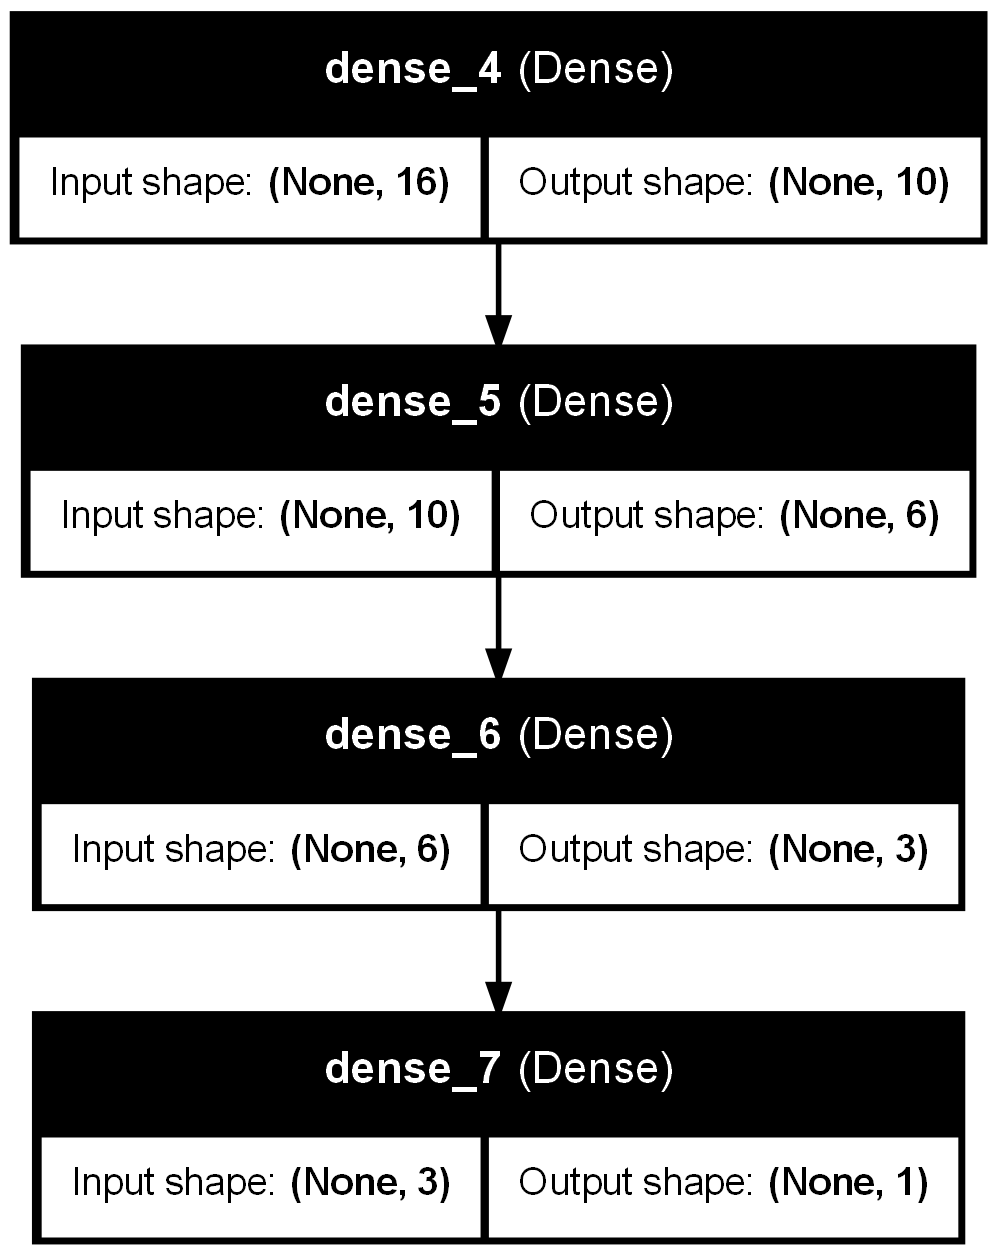

In [40]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

### 4. Train the model using basic parameters.

In [41]:
batch_size = 20
num_steps(len(X_train), batch_size)

8

In [42]:
history = model.fit(X_train, Y_train, 
                    validation_data=[X_val, Y_val],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 4846.0176 - mean_absolute_percentage_error: 97.9861 - val_loss: 24436.6816 - val_mean_absolute_percentage_error: 99.1802
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4437.4448 - mean_absolute_percentage_error: 97.9527 - val_loss: 24421.2402 - val_mean_absolute_percentage_error: 98.9346
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4678.2461 - mean_absolute_percentage_error: 97.2724 - val_loss: 24406.2383 - val_mean_absolute_percentage_error: 98.6626
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4458.7588 - mean_absolute_percentage_error: 96.4196 - val_loss: 24390.5273 - val_mean_absolute_percentage_error: 98.3436
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4665.7451 - mean_absolute_percentage_error: 96.0644 - val_loss: 24374.1934 - val_mean_absolute_percentage_error: 97.9844
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4182.5801 - mean_absolute_percentage_error: 95

### 5. Analyse the model performance using loss and accuracy curves

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

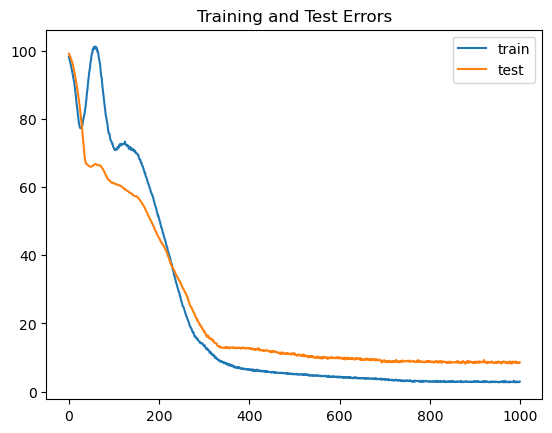

In [ ]:
# plot training history
plt.plot(history.history['mean_absolute_percentage_error'], label='train')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()